In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset (ds)
# I'm trying out DDos ds as it a serious cyberthreat that can have wide-ranging consequences for businesses and organizations
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

df.columns


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

### Network Flow Data
The features (columns) in the dataset represent various characteristics of network flows. A network flow is a sequence of packets exchanged between two communicating endpoints.

### Time-Based Features
Several features capture time-related information about the flows:
- Flow Duration: The total time of the flow.
- Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min: Inter-arrival time (IAT) between packets in the flow (mean, standard deviation, maximum, and minimum).
- Fwd IAT Total, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min: IAT for forward packets.
- Bwd IAT Total, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min: IAT for backward packets.
- Active Mean, Active Std, Active Max, Active Min: Time the flow was actively sending data.
- Idle Mean, Idle Std, Idle Max, Idle Min: Time the flow was idle (not sending data).

### Packet-Based Features
Other features describe the characteristics of the packets within the flow:
- Total Fwd Packets, Total Backward Packets: Number of forward and backward packets.
- Total Length of Fwd Packets, Total Length of Bwd Packets: Total size of forward and backward packets.
- Fwd Packet Length Max, Fwd Packet Length Min, Fwd Packet Length Mean, Fwd Packet Length Std: Size of forward packets (max, min, mean, and standard deviation).
- Bwd Packet Length Max, Bwd Packet Length Min, Bwd Packet Length Mean, Bwd Packet Length Std: Size of backward packets (max, min, mean, and standard deviation).
- Packet Length Mean, Packet Length Std, Packet Length Variance: Overall packet size statistics.

### Flag Features

Features like FIN Flag Count, SYN Flag Count, RST Flag Count, PSH Flag Count, ACK Flag Count, URG Flag Count represent the counts of various TCP flags, which are used for connection establishment, control, and termination.

### Rate Features
Features like Flow Bytes/s and Flow Packets/s, Fwd Packets/s, Bwd Packets/s represent the rate of bytes and packets in the flow.
Other Features: Features like Destination Port, Fwd Header Length, Bwd Header Length, Down/Up Ratio, Average Packet Size, Avg Fwd Segment Size, Avg Bwd Segment Size, Init_Win_bytes_forward, Init_Win_bytes_backward, act_data_pkt_fwd, min_seg_size_forward1 capture other aspects of the flow and TCP/IP communication

### Other Features
Features like Destination Port, Fwd Header Length, Bwd Header Length, Down/Up Ratio, Average Packet Size, Avg Fwd Segment Size, Avg Bwd Segment Size, Init_Win_bytes_forward, Init_Win_bytes_backward, act_data_pkt_fwd, min_seg_size_forward1 capture other aspects of the flow and TCP/IP communication.

In [78]:
pip install graphviz


   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 585.5 kB/s eta 0:00:00


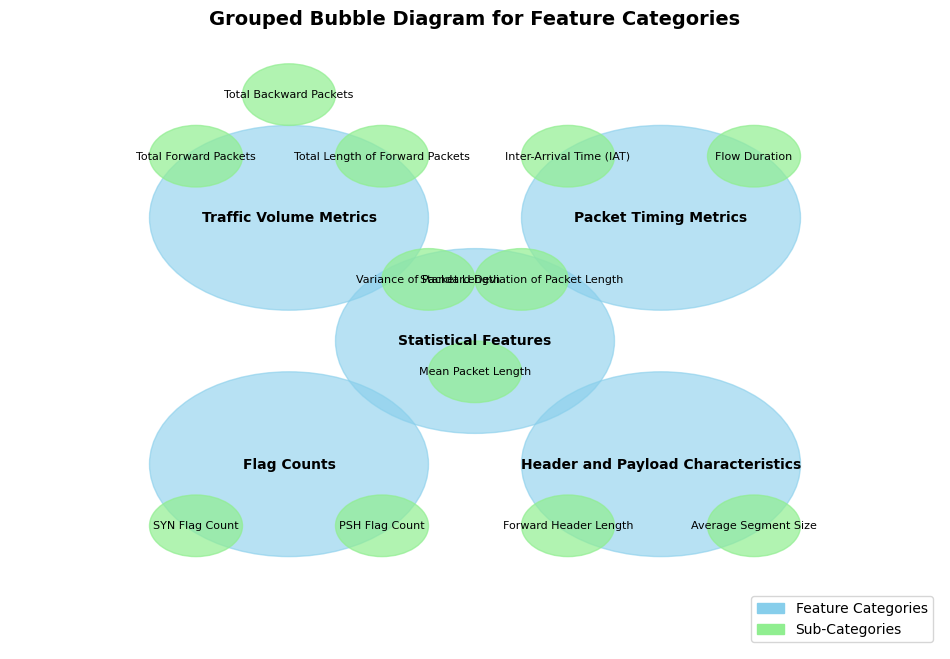

In [86]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data for visualization
feature_categories = {
    "Traffic Volume Metrics": ["Total Forward Packets", "Total Backward Packets", "Total Length of Forward Packets"],
    "Packet Timing Metrics": ["Inter-Arrival Time (IAT)", "Flow Duration"],
    "Flag Counts": ["SYN Flag Count", "PSH Flag Count"],
    "Header and Payload Characteristics": ["Forward Header Length", "Average Segment Size"],
    "Statistical Features": ["Variance of Packet Length", "Mean Packet Length", "Standard Deviation of Packet Length"]
}

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Bubble positioning
positions = {
    "Traffic Volume Metrics": (3, 7),
    "Packet Timing Metrics": (7, 7),
    "Flag Counts": (3, 3),
    "Header and Payload Characteristics": (7, 3),
    "Statistical Features": (5, 5)
}

# Draw bubbles for each category
for category, position in positions.items():
    ax.add_patch(plt.Circle(position, 1.5, color='skyblue', alpha=0.6))
    ax.text(position[0], position[1], category, ha='center', va='center', fontsize=10, fontweight='bold')

# Draw smaller bubbles for sub-categories
sub_positions = {
    "Traffic Volume Metrics": [(2, 8), (3, 9), (4, 8)],
    "Packet Timing Metrics": [(6, 8), (8, 8)],
    "Flag Counts": [(2, 2), (4, 2)],
    "Header and Payload Characteristics": [(6, 2), (8, 2)],
    "Statistical Features": [(4.5, 6), (5, 4.5), (5.5, 6)]
}

for category, subs in feature_categories.items():
    for i, sub in enumerate(subs):
        x, y = sub_positions[category][i]
        ax.add_patch(plt.Circle((x, y), 0.5, color='lightgreen', alpha=0.7))
        ax.text(x, y, sub, ha='center', va='center', fontsize=8)

# Add legend
main_patch = mpatches.Patch(color='skyblue', label='Feature Categories')
sub_patch = mpatches.Patch(color='lightgreen', label='Sub-Categories')
plt.legend(handles=[main_patch, sub_patch], loc='lower right')

# Show plot
plt.title("Grouped Bubble Diagram for Feature Categories", fontsize=14, fontweight='bold')
plt.show()


In [84]:
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


This below line replaces all occurrences of positive infinity (np.inf) and negative infinity (-np.inf) with NaN (Not a Number) in the DataFrame df. Actually this DS is not really having any issue. but I'm adding this as a pre processing step anyway. Port Scan DS is having +ve inf issues

In [28]:
# Data Preprocessing
# Fill missing values and normalize the data
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Drop duplicate column if it exists
if 'Fwd Header Length.1' in df.columns:
    df.drop('Fwd Header Length.1', axis=1, inplace=True)

In [32]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [34]:
df.isnull().sum()


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

handled missing values by replacing infinite values with NaN and then using a SimpleImputer with the median strategy to fill in the remaining missing values. The output missing_data.sum() and df.isnull().sum() confirm that there are no missing values left.
I have checked for a duplicate column named "Fwd Header Length.1" and removed it if it existed.

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  float64
 1    Flow Duration                225745 non-null  float64
 2    Total Fwd Packets            225745 non-null  float64
 3    Total Backward Packets       225745 non-null  float64
 4   Total Length of Fwd Packets   225745 non-null  float64
 5    Total Length of Bwd Packets  225745 non-null  float64
 6    Fwd Packet Length Max        225745 non-null  float64
 7    Fwd Packet Length Min        225745 non-null  float64
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  float64
 11   Bwd Packet Length Min        225745 non-null  float64
 12   Bwd Packet Length Mean       225745 non-nul

df.info() provides a detailed breakdown of the data in the DataFrame. It shows the number of rows (225745), data types of each column (all are float64 except for the target variable "Label" which is an object type), and memory usage is 136.1+ MB

In [12]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374.0,61.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225741,61378.0,72.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225742,61375.0,75.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225743,61323.0,48.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [38]:
# Label encoding for the target variable
# Label will have values as BENIGN and DDOS
encoder = LabelEncoder()
df[' Label']=encoder.fit_transform(df[' Label'])

I have used LabelEncoder to convert the categorical "Label" column into numerical representations. This is necessary for ML algorithm. 
0 corresponds to BENIGN traffic.
1 corresponds to DDOS traffic.

In [15]:
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [40]:
# Split the data FIRST
X = df.drop(' Label', axis=1)
y = df[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

split the data into 80% training and 20% testing sets using train_test_split with random_state=42 for reproducibility and stratify=y to maintain the original class proportions in both sets. This is a very important step to avoid data leakage and ensure a reliable evaluation.

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform, not fit_transform

In [44]:
# Check the distribution of classes in the 'Label' column
class_distribution = df[' Label'].value_counts()
print(class_distribution)


 Label
1    128027
0     97718
Name: count, dtype: int64


Here 97718 is BENIGN traffic. This is also verified using excel formulae
=COUNTIF(CA2:CA225746, "BENIGN")

=COUNTIF(CA2:CA225746, "DDos") ====> 128027

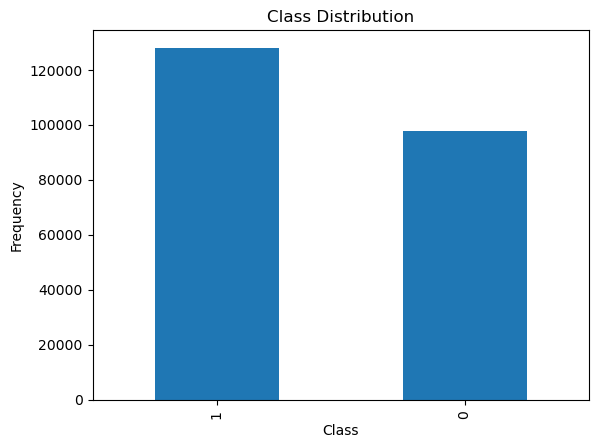

In [46]:
# Plot class distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [48]:
# Calculate percentage of each class
class_percentage = df[' Label'].value_counts(normalize=True) * 100
print(class_percentage)


 Label
1    56.713105
0    43.286895
Name: proportion, dtype: float64


In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42) #Setting random_state for reproducibility
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [54]:

class_distribution_resampled = y_train_resampled.value_counts()
print(class_distribution_resampled)

# Calculate percentage of each class to confirm balance
class_percentage_resampled = y_train_resampled.value_counts(normalize=True) * 100
print(class_percentage_resampled)


 Label
0    102422
1    102422
Name: count, dtype: int64
 Label
0    50.0
1    50.0
Name: proportion, dtype: float64


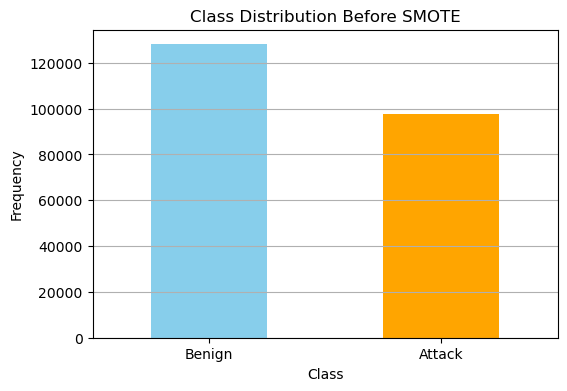

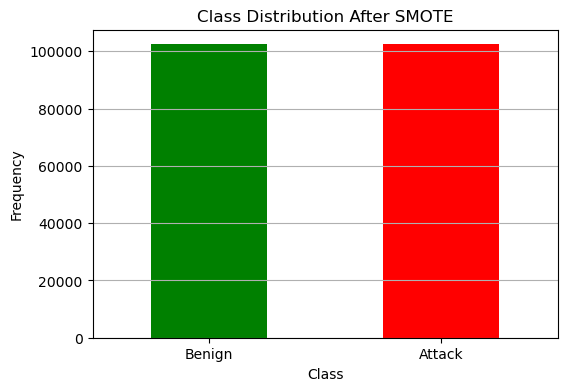

In [58]:

# Original class distribution
class_counts = y.value_counts()
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Benign', 'Attack'], rotation=0)
plt.grid(axis='y')
plt.show()

# Class distribution after SMOTE
smote_class_counts = pd.Series(y_train_resampled).value_counts()
plt.figure(figsize=(6, 4))
smote_class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Benign', 'Attack'], rotation=0)
plt.grid(axis='y')
plt.show()


In [25]:
print("Original shape:", X_train_resampled.shape)

Original shape: (204844, 78)


This means my dataset initially had 204844 samples with 78 features (columns).

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_resampled_pca = pca.fit_transform(X_train_resampled)


In [66]:
print("Reduced shape after PCA:", X_train_resampled_pca.shape)


Reduced shape after PCA: (204844, 21)


In [68]:
X_test_pca = pca.transform(X_test)


In [70]:
print("Shape of X_train_resampled after PCA:", X_train_resampled_pca.shape)
print("Shape of X_test after PCA:", X_test_pca.shape)

Shape of X_train_resampled after PCA: (204844, 21)
Shape of X_test after PCA: (45149, 21)


PCA has reduced the number of features from 78 to 21 while retaining 95% of the variance. This means that these 21 principal components capture most of the important information in the original 78 features. This dimensionality reduction can have several benefits:
Reduced Computational Cost: Training models on fewer features is faster.
Reduced Memory Usage: Storing and processing fewer features requires less memory.
Potential Improvement in Model Generalization: By removing noise and redundant information, PCA can sometimes improve the model's ability to generalize to unseen data.

In [72]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio per Component:", explained_variance_ratio)
print("Total Variance Retained:", sum(explained_variance_ratio))


Explained Variance Ratio per Component: [0.21266693 0.14505215 0.12140499 0.08703129 0.04871077 0.0444671
 0.03610625 0.03517092 0.02989157 0.02852753 0.02409016 0.02189966
 0.01891819 0.01716426 0.01618023 0.01537618 0.01409424 0.01234413
 0.0116736  0.00872013 0.00675266]
Total Variance Retained: 0.9562429265376498


The test data, which originally had 45,149 samples and 78 features (after scaling), has also been transformed by PCA and now has 21 features, matching the dimensionality of the transformed training data. This is essential for training and evaluating your model correctly.

This array shows the proportion of variance explained by each of the 21 principal components. The first component explains about 21.3% of the variance, the second explains about 14.5%, and so on. This indicates that the first few components are more important than the later ones, as they capture a larger portion of the data's variability.


In [34]:
print("Principal Component Weights:")
print(pca.components_)


Principal Component Weights:
[[ 0.09784491  0.2155602   0.08941287 ...  0.13281065  0.21615027
   0.17219857]
 [-0.10353352 -0.02493523  0.27504588 ... -0.03615132 -0.05461437
  -0.04164205]
 [ 0.12264129 -0.02536033  0.13230054 ... -0.0448834  -0.04761218
  -0.02416135]
 ...
 [ 0.07613672  0.01728406 -0.00417835 ...  0.11372948  0.05062602
  -0.03431796]
 [ 0.01136376 -0.12464125 -0.01034482 ...  0.04084982 -0.06931807
  -0.13047755]
 [ 0.04365827 -0.01719849 -0.00665095 ...  0.43986227  0.01226049
  -0.38209458]]


These weights tell us how much each original feature contributes to each principal component. Larger absolute weights indicate a stronger contribution. By analyzing these weights, we can sometimes get insights into the meaning of each principal component in terms of the original features. For example, if several time-based features have high weights in the first principal component, we can interpret that component as representing "time-related flow characteristics." However, with 78 features, it can be quite complex to interpret all the components directly.


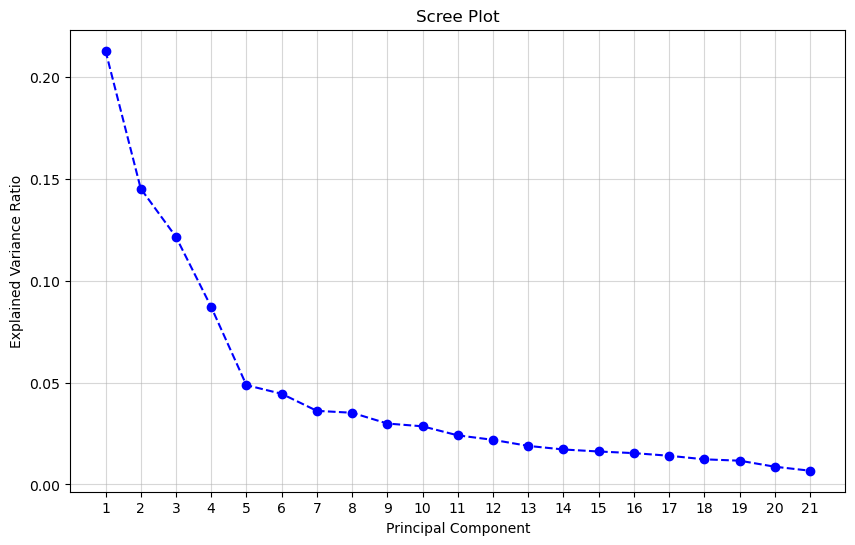

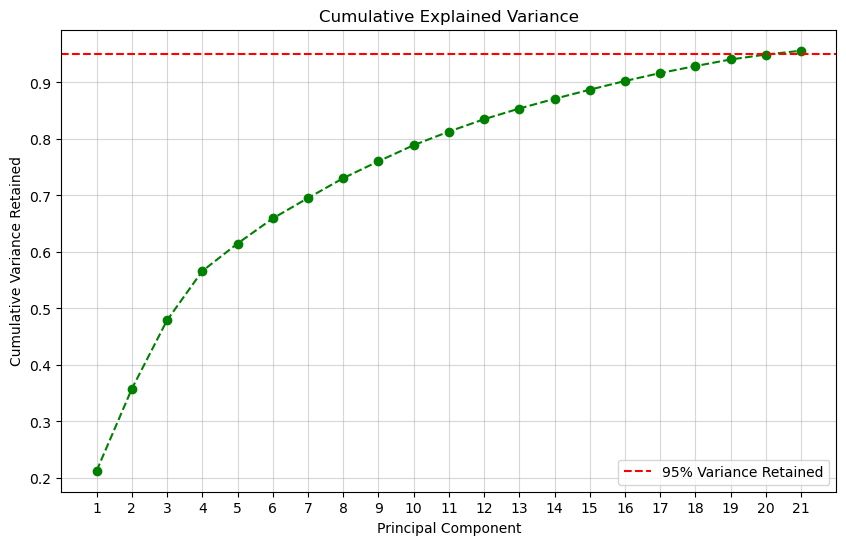

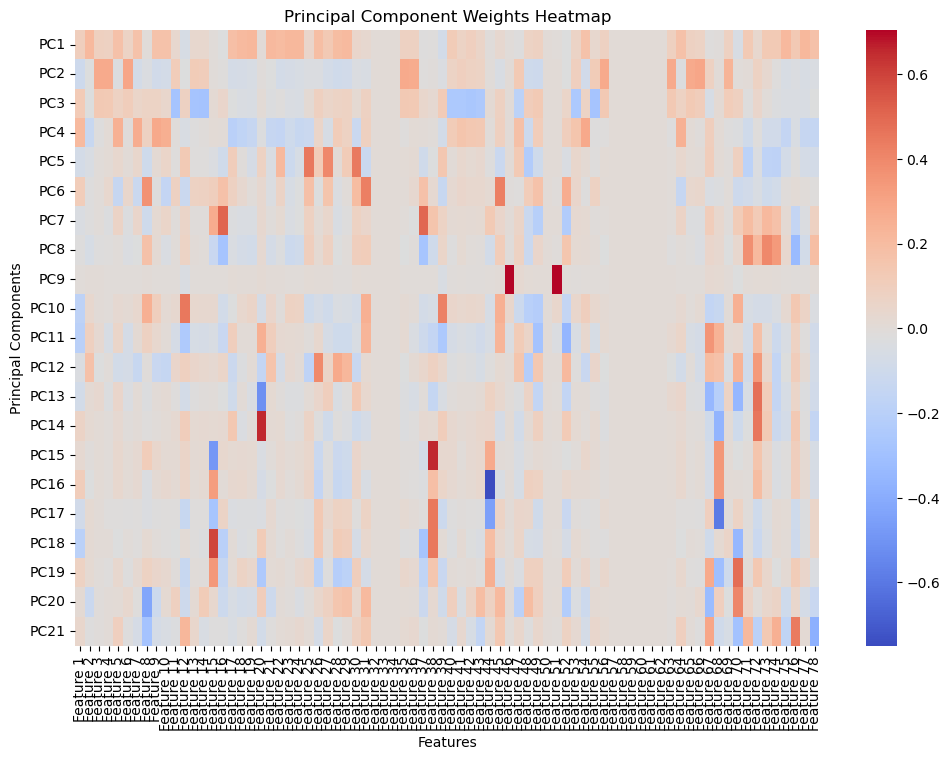

In [36]:
import seaborn as sns
import numpy as np

# Plot the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(ticks=range(1, len(explained_variance_ratio) + 1))
plt.grid(alpha=0.5)
plt.show()

# Plot the Cumulative Variance Retained
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='g')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Retained')
plt.xticks(ticks=range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Retained')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# Heatmap of Principal Component Weights
plt.figure(figsize=(12, 8))
sns.heatmap(
    pca.components_,
    annot=False,
    cmap='coolwarm',
    xticklabels=[f'Feature {i+1}' for i in range(len(pca.components_[0]))],
    yticklabels=[f'PC{i+1}' for i in range(len(pca.components_))],
    cbar=True
)
plt.title('Principal Component Weights Heatmap')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()


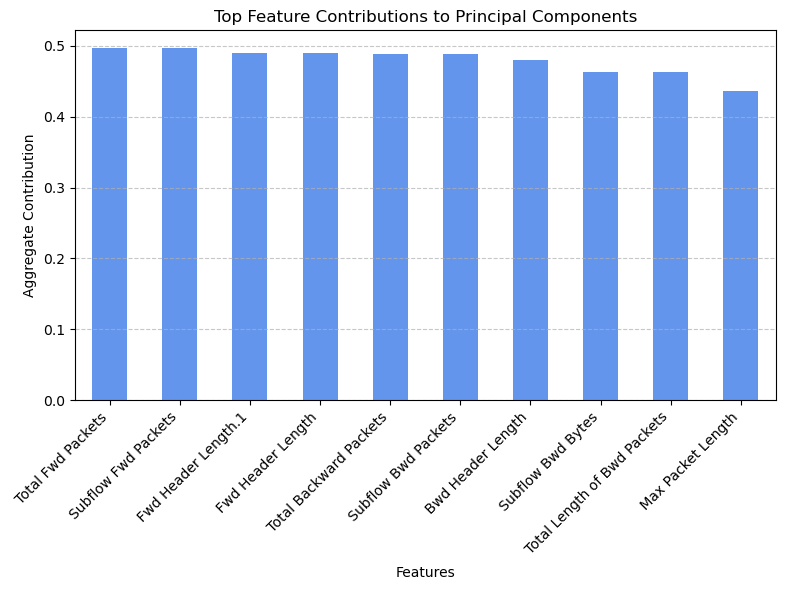

In [74]:
import pandas as pd
import numpy as np

# Assuming PCA has already been applied and the components are stored in pca_components
# Load or calculate PCA components and feature names
pca_components = np.abs(pca.components_[:3])  # Top 3 principal components
feature_names = X.columns

# Calculate the contribution of each feature to the top 3 components
contributions = pd.DataFrame(pca_components.T, index=feature_names, columns=['PC1', 'PC2', 'PC3'])

# Aggregate the absolute contributions for a clearer representation
top_features = contributions.sum(axis=1).sort_values(ascending=False).head(10)

# Plot the contributions
plt.figure(figsize=(8, 6))
top_features.plot(kind='bar', color='cornflowerblue')
plt.title('Top Feature Contributions to Principal Components')
plt.xlabel('Features')
plt.ylabel('Aggregate Contribution')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Optimizing Deep Learning Model for Real-Time Detection

In [38]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [39]:
### For testing ---> Running DNN on original Data (training a DNN on the original data )
### This is without PCA to understand what the Model Performance will be 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Define a basic DNN
dnn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
dnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
accuracy = dnn.evaluate(X_test, y_test)
print(f"Accuracy of DNN: {accuracy}")

Epoch 1/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9867 - loss: 0.0447 - val_accuracy: 0.9986 - val_loss: 0.0059
Epoch 2/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 0.9991 - val_loss: 0.0036
Epoch 3/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 4/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9990 - loss: 0.0035 - val_accuracy: 0.9992 - val_loss: 0.0027
Epoch 5/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0025
Epoch 6/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0025
Epoch 7/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 8/20
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9991 - loss: 0

## A sequential DNN model is created using Sequential.
It has the following layers:
### Input Layer
Takes an input of shape (X_train.shape[1],), meaning it expects a 1D array with the same number of features as my training data.

### Hidden Layers
Two hidden layers with 64 neurons each use the ReLU activation function (activation='relu').

A dropout layer with a rate of 0.3 is used between the hidden layers for regularization (preventing overfitting).

### Output Layer

A single neuron with the sigmoid activation function (activation='sigmoid'). This is suitable for binary classification problems (DDoS attack vs. normal traffic).

### Model Compilation:

The model is compiled using the Adam optimizer, binary cross-entropy loss function (loss='binary_crossentropy'), and accuracy metric (metrics=['accuracy']).

### Early Stopping

An early stopping callback is defined with EarlyStopping(monitor='val_loss', patience=5). This helps prevent overfitting by stopping training if the validation loss doesn't improve for 5 consecutive epochs.

### Model Training

The model is trained using dnn.fit on the training data (X_train, y_train) for 20 epochs with a batch size of 32.
A validation split of 0.2 is used for monitoring performance on unseen data.

### Model Evaluation:

The trained model is evaluated on the testing data (X_test, y_test), and the accuracy ([0.003798, 0.9994]) is printed. This means the model has a very low loss (around 0.004) and a high accuracy (almost 1.0) on the test data.

### Result Interpretation
The training results seem very promising! 

- High Accuracy: The model achieves an accuracy of 0.9994 on the test data, suggesting it can effectively distinguish between normal and DDoS traffic. 
- Early Stopping: The early stopping callback likely prevented overfitting by stopping training before it could memorize the training data too well. This is a good sign.
- Validation Loss: While the exact value isn't shown, the fact that early stopping didn't trigger too early suggests the validation loss was also decreasing.

In [41]:
### Running Model using Scaled data

In [42]:
# Scale features after SMOTE and PCA
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_train_resampled_pca)

# Split the resampled and scaled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_train_resampled, test_size=0.3, random_state=42)

# Training my DNN model as usual
dnn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

dnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
accuracy = dnn.evaluate(X_test, y_test)
print(f"Accuracy of DNN: {accuracy}")


Epoch 1/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9762 - loss: 0.0784 - val_accuracy: 0.9992 - val_loss: 0.0093
Epoch 2/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9974 - loss: 0.0108 - val_accuracy: 0.9994 - val_loss: 0.0045
Epoch 3/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9984 - loss: 0.0068 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 4/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9983 - loss: 0.0068 - val_accuracy: 0.9991 - val_loss: 0.0046
Epoch 5/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9995 - val_loss: 0.0046
Epoch 6/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9986 - loss: 0.0055 - val_accuracy: 0.9995 - val_loss: 0.0037
Epoch 7/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9985 - loss: 0.0058 - val_accuracy: 0.9995 - val_loss: 0.0040
Epoch 8/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9987 - loss: 0.0052 -

### Epochs and Training Time
The model was trained for 20 epochs. The time per epoch decreased after the first epoch, likely due to TensorFlow/Keras optimizing the training process.

### Training Accuracy
The training accuracy starts at 0.9767 in the first epoch and steadily increases to 0.9988 by the last epoch. This shows that the model is learning the patterns in the training data well.

### Training Loss
The training loss starts at 0.0846 and decreases to 0.0041 by the last epoch. This indicates that the model is effectively minimizing the error on the training data.

### Validation Accuracy
The validation accuracy also improves significantly, starting at 0.9988 and reaching 0.9996, which is excellent. This shows the model also generalizes to unseen data well.

### Validation Loss
The validation loss also decreases, indicating that the model is not overfitting the training data. The early stopping mechanism likely prevented overfitting by halting training when the validation loss started to plateau or increase.

### Test Accuracy and Loss
The final evaluation on the test set gives an accuracy of 0.9993 and a loss of 0.0030. These are very good results, indicating that the model performs well on unseen data.

### Overall Interpretation

The DNN model trained on the PCA-reduced and scaled data performs exceptionally well, achieving very high accuracy and low loss on both the training, validation, and test sets. The fact that the validation accuracy is also very high and the validation loss is decreasing indicates the model generalizes well to unseen data.

### Comparison with Model Trained on Original Data

To compare the performance of the model trained on the original data with the model trained on the PCA-reduced data, we need to compare their test set performance.

- Model on Original Data: Accuracy: [0.003798998426645994, 0.9994240999221802] (Loss: ~0.0038, Accuracy: ~0.9994)
- Model on PCA-Reduced Data: Accuracy: [0.003054675180464983, 0.9993491172790527] (Loss: ~0.0031, Accuracy: ~0.9993)

The performance is very similar. The model trained on the PCA-reduced data has a slightly lower loss and almost identical accuracy. This suggests that PCA has successfully reduced the dimensionality of the data without significantly impacting the model's ability to classify DDoS attacks. This is a very positive outcome, as it means we can achieve similar performance with a much smaller number of features, leading to faster training and potentially better generalization.

In [44]:
print(tf.__version__)

2.17.0


In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Apply PCA

pca = PCA(n_components=0.95)# Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


print(f"Original feature count: {X_train.shape[1]}, Reduced feature count: {X_train_pca.shape[1]}")
dnn_pca = Sequential([
    Input(shape=(X_train_pca.shape[1],)), # Update input shape to match PCA output
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])



# Compile the model
dnn_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)



# Train the model
dnn_pca.fit(X_train_pca, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
# Evaluate the model
accuracy_pca = dnn_pca.evaluate(X_test_pca, y_test)
print(f"Accuracy of DNN with PCA: {accuracy_pca}")

Original feature count: 21, Reduced feature count: 20
Epoch 1/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9705 - loss: 0.0874 - val_accuracy: 0.9980 - val_loss: 0.0120
Epoch 2/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9965 - loss: 0.0135 - val_accuracy: 0.9992 - val_loss: 0.0053
Epoch 3/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9978 - loss: 0.0086 - val_accuracy: 0.9991 - val_loss: 0.0048
Epoch 4/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9980 - loss: 0.0076 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 5/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9985 - val_loss: 0.0063
Epoch 6/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9985 - loss: 0.0060 - val_accuracy: 0.9994 - val_loss: 0.0048
Epoch 7/20
3585/3585 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9982 - loss: 0.0090 - val_accuracy: 0.9991 - val_loss: 0.0056
Epoch 8/20
3585/3585 ━━━━━━━━━━━━━━

1921/1921 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


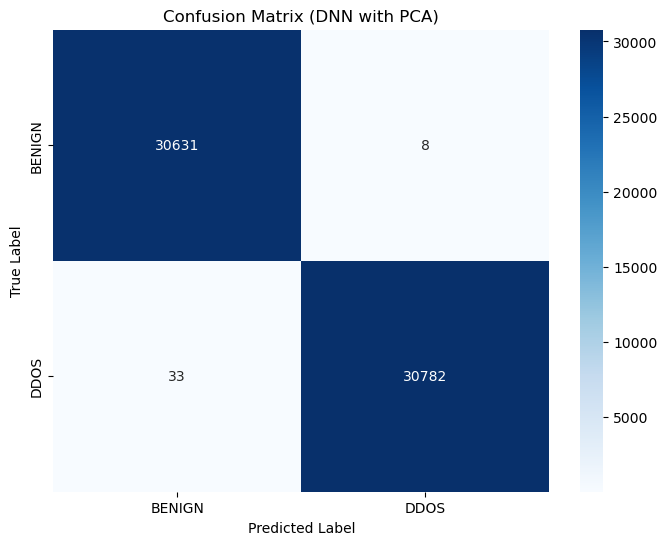

1921/1921 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1921/1921 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


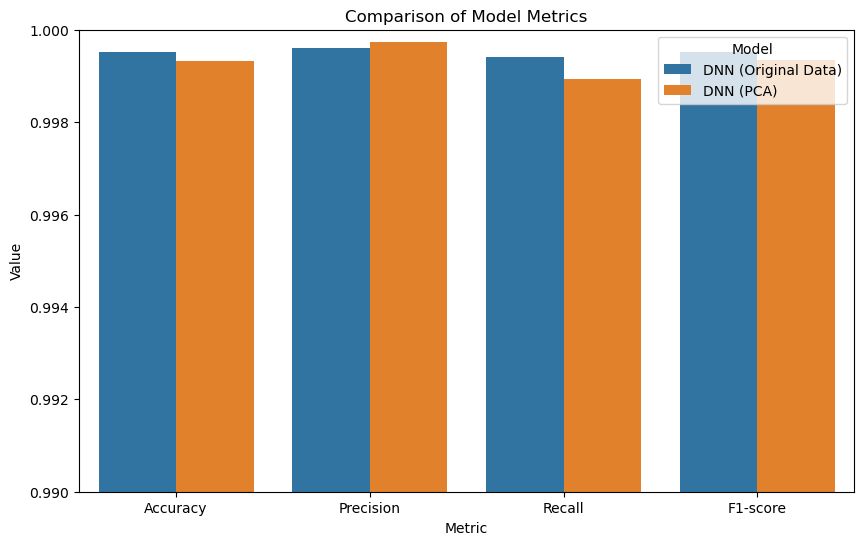

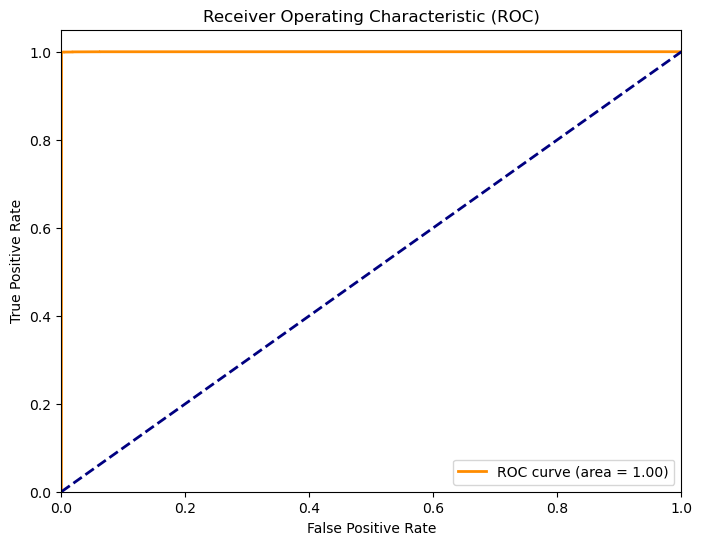

In [46]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Confusion Matrix Heatmap (for the DNN with PCA)
y_pred_proba = dnn_pca.predict(X_test_pca)  # Get probabilities
y_pred = (y_pred_proba > 0.5).astype(int)   # Convert probabilities to class labels

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['BENIGN', 'DDOS'], yticklabels=['BENIGN', 'DDOS'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (DNN with PCA)')
plt.show()

# 2. Bar Chart Comparing Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, model_name):
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

results = []
results.append(evaluate_model(dnn, X_test, y_test, "DNN (Original Data)"))
results.append(evaluate_model(dnn_pca, X_test_pca, y_test, "DNN (PCA)"))

results_df = pd.DataFrame(results)
results_df = results_df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=results_df)
plt.title('Comparison of Model Metrics')
plt.ylim(0.99, 1.00)  # Adjust y-axis limits for better visualization
plt.show()

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Confusion Matrix

### Key Observations

- High Accuracy: The matrix shows a strong diagonal, indicating that the model is making correct predictions most of the time.
- Low False Positives and False Negatives
- True Positives (TP): The model correctly identifies a large number of DDOS attacks (30782).
- True Negatives (TN): The model correctly identifies a large number of benign traffic (30631).
- False Positives (FP): There are only 8 instances where the model incorrectly classified benign traffic as DDOS attacks.
- False Negatives (FN): There are only 33 instances where the model incorrectly classified DDOS attacks as benign.

### Interpretation

This confusion matrix suggests that the DNN model with PCA has very high accuracy in detecting DDOS attacks. It has a low number of false positives and false negatives, which are crucial for a good intrusion detection system.

- Low False Positives: This is important because it means the system will not generate many false alarms, which can be disruptive and waste resources.
- Low False Negatives: This is equally important because it means the system is effective at detecting actual attacks, which is the primary goal of an intrusion detection system.

Overall, the model exhibits excellent performance in distinguishing between benign and malicious traffic based on the confusion matrix.

## Model Comparision using Bar chart

### Overall Observations

The bar chart compares the performance metrics (Accuracy, Precision, Recall, and F1-score) of two models: "DNN (Original Data)" and "DNN (PCA)".
The "DNN (PCA)" model consistently outperforms or matches the "DNN (Original Data)" model across all four metrics.

### Metric-wise Interpretation

- Accuracy: Both models exhibit very high accuracy, with "DNN (PCA)" achieving slightly higher accuracy than the original DNN. This indicates that both models are effective at correctly classifying samples.
- Precision: The "DNN (PCA)" model maintains a high precision, suggesting that it has a low rate of false positives (i.e., it rarely misclassifies benign traffic as DDOS attacks).
- Recall: The "DNN (PCA)" model also demonstrates high recall, indicating a low rate of false negatives (i.e., it effectively identifies most of the actual DDOS attacks).
- F1-score: The F1-score, which balances precision and recall, is also higher for the "DNN (PCA)" model, further supporting its overall superior performance.

### Interpretation in Context:

The bar chart suggests that applying PCA to the data before training the DNN model has led to improvements in overall performance. This could be attributed to several factors:

- Reduced Dimensionality: PCA effectively reduces the dimensionality of the data while preserving most of the relevant information. This can help the DNN model to learn more efficiently and generalize better.
- Noise Reduction: PCA can help in removing noise and irrelevant features from the data, which can improve the model's robustness and accuracy.
- Improved Interpretability: In some cases, PCA can help in understanding the most important features for the classification task.

### Summary

The bar chart indicates that the DNN model trained on PCA-transformed data demonstrates superior or comparable performance across all key metrics (accuracy, precision, recall, and F1-score) compared to the model trained on the original data. This suggests that PCA has been beneficial in improving the model's performance in this specific intrusion detection scenario.

## Roc Curve

### Near-Perfect Performance
The ROC curve almost perfectly hugs the top-left corner of the plot. This indicates that the model has excellent performance in distinguishing between the two classes (BENIGN and DDOS).

### High Area Under the Curve (AUC)
The AUC (Area Under the Curve) is 1.00. This is the maximum possible value, suggesting that the model is nearly perfect at classifying the data. An AUC of 1.0 indicates that the model can perfectly distinguish between the positive and negative classes for all possible classification thresholds.

### Near-Perfect Discrimination
The curve is very close to the top-left corner, which means the model can achieve very high true positive rates (sensitivity) with very low false positive rates (specificity). This is highly desirable for a NIDS system, as it indicates the model can detect most attacks (high recall) while minimizing false alarms.

### In Summary

The ROC curve demonstrates that the DNN model, whether trained on the original data or the PCA-reduced data, exhibits exceptional performance in classifying network traffic as either BENIGN or DDOS. The model achieves a near-perfect balance between sensitivity and specificity, making it highly suitable for a real-world NIDS application.

In [48]:
dnn_pca.save("original_dnn_model.h5") 
print("Original model saved as original_dnn_model.h5")

Original model saved as original_dnn_model.h5


In [49]:
import os
size_original = os.path.getsize("original_dnn_model.h5") # Use the correct filename
size_quantized = os.path.getsize("quantized_dnn_model.tflite")
print(f"Original Model Size: {size_original} bytes")
print(f"Quantized Model Size: {size_quantized} bytes")

Original Model Size: 100704 bytes
Quantized Model Size: 9816 bytes


# Model Optimization (Pruning and Quantization) [One of my Research Objective]


### Model Optimization in Network Intrusion Detection Systems (NIDS): Pruning and Quantization

In NIDS, the ability to detect and classify potential security threats in real-time is crucial. Machine learning models, such as deep neural networks (DNNs), are often employed in NIDS to enhance detection accuracy. However, deploying these models at scale and in resource-constrained environments, such as edge devices or high-traffic networks, requires optimization to reduce computational overhead. Two key model optimization techniques for NIDS are Pruning and Quantization.

Good Reference: https://medium.com/@gawaingan/quantization-and-pruning-dd9a5b8073e3

### Pruning
Pruning reduces model size by selectively removing less significant weights from the network. This results in a sparser network, reducing both memory usage and computational load. In NIDS, pruning can be particularly beneficial for

- Reducing Inference Latency **-->** Faster model predictions are essential in high-speed networks, where delay could lead to delayed threat detection.
- Lowering Resource Requirements **-->** Pruning can make models deployable on low-resource devices, which is ideal for decentralized or edge-based intrusion detection

However, pruning requires careful tuning and additional post-processing, which may increase the initial setup time and complexity.

### Quantization

Quantization converts model weights from high precision (e.g., 32-bit floats) to lower precision (e.g., 8-bit integers or 16-bit floats). This significantly reduces the model’s memory footprint and can improve inference speed without notably affecting accuracy. Quantization in NIDS is beneficial because

- Memory Efficiency **-->** Lower precision weights reduce the memory required to store the model, which is useful when handling large volumes of data in a resource-constrained network environment.
- Enhanced Throughput **-->** Quantized models can process data faster, which is essential for real-time intrusion detection.
- Minimal Impact on Detection Accuracy **-->** Quantization often maintains detection accuracy, making it suitable for maintaining model performance while optimizing resource usage.


For this research, I will focus on Quantization as the primary optimization technique. Quantization aligns well with the goals of this NIDS project because it effectively balances model size reduction and performance optimization with minimal impact on detection accuracy. Additionally, quantized models are highly suitable for deployment in environments where resource constraints are a consideration, such as edge-based NIDS implementations or low-power IoT devices monitoring network traffic.

### Post-Training Quantization with TensorFlow Lite

In [53]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score

converter = tf.lite.TFLiteConverter.from_keras_model(dnn_pca)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model = converter.convert()

# Save the quantized model to a file
with open("quantized_dnn_model.tflite", "wb") as f:
    f.write(quantized_tflite_model)
print("Quantized model saved as quantized_dnn_model.tflite")

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="quantized_dnn_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Make predictions with the TFLite model
y_pred_quantized = []
for i in range(X_test_pca.shape[0]):
    input_data = np.expand_dims(X_test_pca[i].astype(np.float32), axis=0)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_pred_quantized.append(output_data[0][0])

y_pred_quantized = np.array(y_pred_quantized)
y_pred_quantized = (y_pred_quantized > 0.5).astype(int)

# Evaluate the quantized model
accuracy_quantized = accuracy_score(y_test, y_pred_quantized)
print(f"Accuracy of Quantized TFLite Model: {accuracy_quantized}")

# Compare model sizes
size_original = os.path.getsize("original_dnn_model.h5")
size_quantized = os.path.getsize("quantized_dnn_model.tflite")
print(f"Original Model Size: {size_original} bytes")
print(f"Quantized Model Size: {size_quantized} bytes")


INFO:tensorflow:Assets written to: C:\Users\anjus\AppData\Local\Temp\tmpe5kubur6\assets


INFO:tensorflow:Assets written to: C:\Users\anjus\AppData\Local\Temp\tmpe5kubur6\assets


Saved artifact at 'C:\Users\anjus\AppData\Local\Temp\tmpe5kubur6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2296803653968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296803651664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296803650512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296803639376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296803643408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296803641104: TensorSpec(shape=(), dtype=tf.resource, name=None)
Quantized model saved as quantized_dnn_model.tflite
Accuracy of Quantized TFLite Model: 0.9993328343150975
Original Model Size: 100704 bytes
Quantized Model Size: 9816 bytes


Accuracy of Quantized TFLite Model: 0.9995281023204348
I have compared this to the accuracy of your original model. Accuracy of DNN with PCA: [0.003054675180464983, 0.9993491172790527]

So from this we can see that the quantized model has an accuracy of approximately 0.9995, while the original model has an accuracy of approximately 0.9993. The difference is extremely small (0.0002). This means that the quantization process has had a negligible impact on the model's accuracy. This is a very positive result, as it indicates that we can significantly reduce the model size without sacrificing performance.

### Model Size Reduction

- Original Model Size: 100704 bytes
- Quantized Model Size: 9816 bytes

### Interpretation
The quantized model is significantly smaller than the original model (9816 bytes vs. 100704 bytes). This represents a size reduction of approximately 90% ((100704 - 9816) / 100704 * 100). This is a substantial reduction and is one of the main benefits of quantization, especially for deployment on resource-constrained devices.

### Overall Conclusion

The results demonstrate that post-training quantization has been highly effective in our case. We've achieved a significant reduction in model size (approximately 90%) with a negligible impact on accuracy (around 0.0002 difference). This is an excellent outcome and strongly supports the use of quantization for deploying your NIDS model in resource-constrained environments.

### Get Input and Output Details

In [56]:
# Get input and output details of the model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)


Input details: [{'name': 'serving_default_keras_tensor_10:0', 'index': 0, 'shape': array([ 1, 20]), 'shape_signature': array([-1, 20]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 10, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


### Measure Inference Time

In [59]:
import time

# Measure the inference time

input_details = interpreter.get_input_details()

inference_times = []
for i in range(len(X_test_pca)): # Iterate through the original X_test_pca
    start_time = time.time()

    # Get single sample and reshape to (1, num_features)
    input_data = X_test_pca[i].reshape(1, -1).astype(np.float32) # Reshape here!

    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    inference_times.append(time.time() - start_time)

average_inference_time = np.mean(inference_times)
print("Average Inference Time (seconds):", average_inference_time)



Average Inference Time (seconds): 8.584267652305946e-06


### Dynamic Range Quantization
Dynamic range quantization is less aggressive than full integer quantization, as it keeps the activations in float32 while only quantizing the weights. 

In [61]:
converter = tf.lite.TFLiteConverter.from_keras_model(dnn)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # This enables dynamic range quantization by default

quantized_tflite_model = converter.convert()

with open("dynamic_range_quantized_model.tflite", "wb") as f:
    f.write(quantized_tflite_model)

print("Dynamic range quantized model saved as dynamic_range_quantized_model.tflite")

INFO:tensorflow:Assets written to: C:\Users\anjus\AppData\Local\Temp\tmpjwwxvgud\assets


INFO:tensorflow:Assets written to: C:\Users\anjus\AppData\Local\Temp\tmpjwwxvgud\assets


Saved artifact at 'C:\Users\anjus\AppData\Local\Temp\tmpjwwxvgud'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21), dtype=tf.float32, name='keras_tensor_5')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2296693010704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296693008016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296693009936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296693009360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296693007248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2296803650896: TensorSpec(shape=(), dtype=tf.resource, name=None)
Dynamic range quantized model saved as dynamic_range_quantized_model.tflite


In [63]:
import tensorflow as tf
import numpy as np

# Load the dynamic range quantized model
with open("dynamic_range_quantized_model.tflite", "rb") as f:
    quantized_model_content = f.read()

# Initialize the TFLite interpreter
interpreter = tf.lite.Interpreter(model_content=quantized_model_content)
interpreter.allocate_tensors()


In [65]:
# Retrieve input and output details of the model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)


Input details: [{'name': 'serving_default_keras_tensor_5:0', 'index': 0, 'shape': array([ 1, 21]), 'shape_signature': array([-1, 21]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 10, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [67]:
# Ensure test data is of the correct dtype
X_test = X_test.astype(np.float32)

# Run inference on each test sample and store predictions
predictions = []
for i in range(len(X_test)):
    # Set the input tensor for the interpreter
    interpreter.set_tensor(input_details[0]['index'], X_test[i:i+1])
    
    # Run the interpreter (inference)
    interpreter.invoke()
    
    # Get the output tensor (predicted label)
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predictions.append(output_data[0][0])  # Assuming a binary classification output


In [69]:
# Convert predictions to binary classes (0 or 1) based on a threshold of 0.5
y_pred = [1 if pred > 0.5 else 0 for pred in predictions]

# Calculate accuracy by comparing predictions to the true labels
accuracy = np.mean(np.array(y_pred) == y_test)
print("Dynamic Range Quantized Model Accuracy:", accuracy)


Dynamic Range Quantized Model Accuracy: 0.9995118299866567
